# K Nearest Neighbors

> ### Euclidean  
> $\sqrt{\sum\limits_{i=1}^k(x_i - y_i)^2}$
>
> ### Manhattan 
> $\sum\limits_{i=1}^k \left| x_i - y_i \right|$
>
> ### Minkowski
> $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

In [1]:
cd ..

/home/jovyan/cap


In [2]:
from sklearn.datasets import load_iris
from IPython.display import Image
% run lib/imports.py
% matplotlib inline

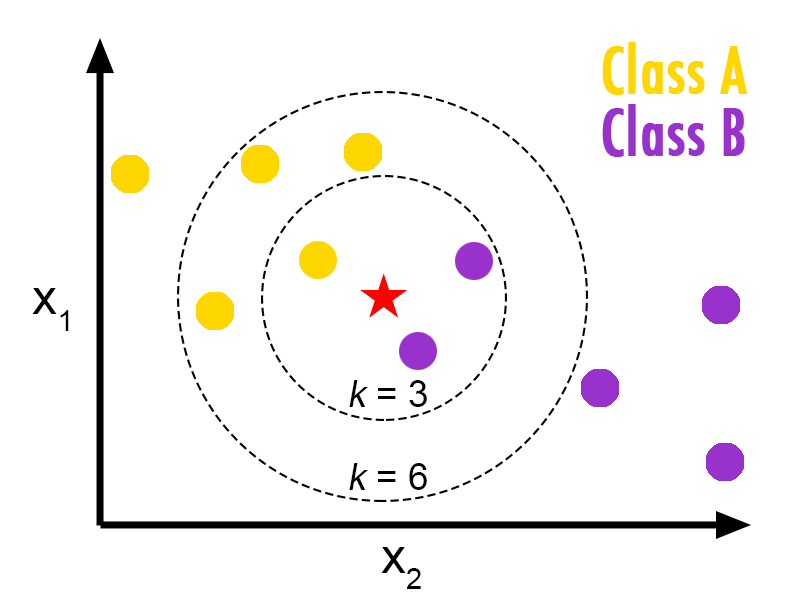

In [24]:
Image('lib/images/KNN.png')

### Using the iris classification data set from sklearn for an example classification

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
species = list(iris.target_names)

columns = ['sepel_length', 'sepel_width', 'petal_length', 'petal_width']

In [7]:
iris_data = pd.DataFrame(iris.data, columns=columns)
iris_target = pd.DataFrame(iris.target)

In [8]:
# combining the data and target into one dataset for graphing
graph_data = pd.DataFrame(iris.data, columns=columns)
graph_data['species'] = pd.DataFrame(iris.target)

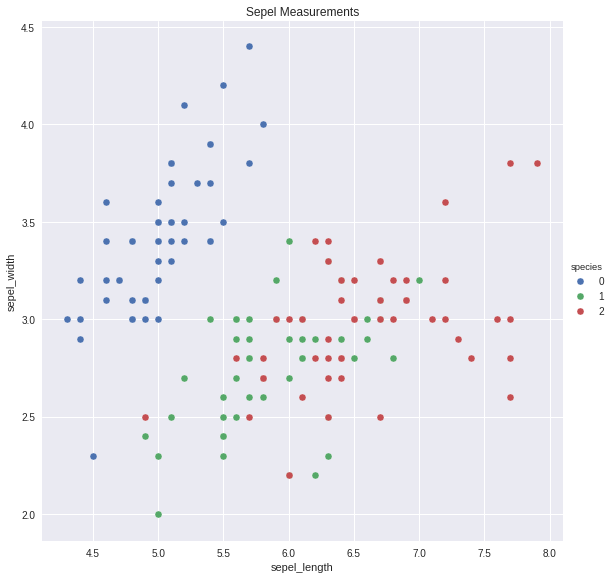

In [9]:
sns.pairplot(x_vars=['sepel_length'], y_vars=['sepel_width'], data=graph_data, hue='species', size=8, )
plt.title('Sepel Measurements')

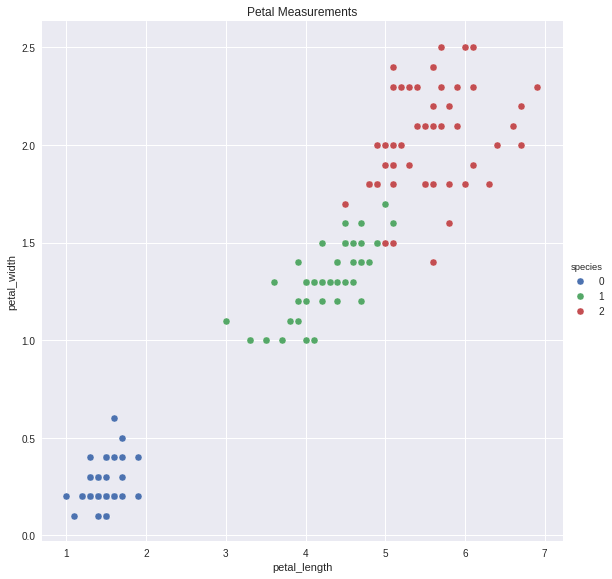

In [10]:
sns.pairplot(x_vars=['petal_length'], y_vars=['petal_width'], data=graph_data, hue='species', size=8)
plt.title('Petal Measurements')

## Comparing scikit-learn KNeighborsClassifier to Custom Nearest Neigbhors

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
ls

data/  DTREE.ipynb  INIT.ipynb  ipynb/  lib/  to_do.md


In [14]:
from lib.models.KNN import KNN

In [15]:
X_tr, X_ts, y_tr, y_ts = train_test_split(iris_data, iris_target, test_size=.5)

### Score

The scikit-learn model uses minkowski distance by default. However, with the default p setting at 2 this gives us the Euclidian distance 

In [16]:
SCI_knc = KNeighborsClassifier(n_neighbors=1)
SCI_knc.fit(X_tr, y_tr)
SCI_knc.score(X_ts, y_ts)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.93333333333333335

In [17]:
MY_knc = KNN()
MY_knc.fit(X_tr, y_tr)
MY_knc.score(X_ts, y_ts)

93.33333333333333

In [29]:
MY_knc_FAST = KNN_FAST()
MY_knc_FAST.fit(X_tr, y_tr)
MY_knc_FAST.score(X_ts, y_ts)

NameError: name 'KNN_FAST' is not defined

### Performance

In [19]:
%%timeit
SCI_knc = KNeighborsClassifier(n_neighbors=1)
SCI_knc.fit(X_tr, y_tr)
SCI_knc.score(X_ts, y_ts)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


1.04 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%%timeit
MY_knc = KNN()
MY_knc.fit(X_tr, y_tr)
MY_knc.score(X_ts, y_ts)

14.8 ms ± 670 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%%timeit
SCI_knc = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
SCI_knc.fit(X_tr, y_tr)
SCI_knc.score(X_ts, y_ts)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


823 µs ± 82.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


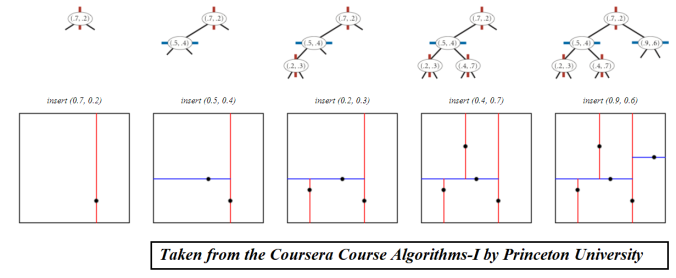

In [26]:
Image('lib/images/TREE.png')

In [ ]:
import numpy as np

class KNN():

    def __init__(self, neighbors=1, distance_metric='minkowski', p=2):
        ''' K-Nearest_Neighbors Classifier'''

        self.n = neighbors
        self.metric = distance_metric
        self.p = p

    def fit(self, X, y):
        
        self.X_fit, self.y_fit = self.data_check(X,y)
        

    def find_distance(self, X):
    
        vector_dist = [(np.absolute(self.X_fit - X[i])**self.p) for i in range(X.shape[0])]
        distance = [[(x.sum())**(1/self.p) for x in X] for X in vector_dist]
    
        return np.array(distance)

    def prediction(self,X,y):
    
        distance = self.find_distance(X)
    
        min_dist_index = [distance[i].argsort()[0:self.n] for i in range(distance.shape[0])]
        nbr_trg = [self.y_fit[min_dist_index[i]] for i in range(len(min_dist_index))]

        pred =[]
        for i in range(len(nbr_trg)):
            trg_id, trg_freq = np.unique(nbr_trg[i], return_counts=True)
            pred_index = trg_freq.argsort()[-1]
            pred.append(trg_id[pred_index])
    
        pred = np.array(pred)
        return pred
#     return pred, trg_freq, trg_id

    def score(self, X,y):
        
        X,y = self.data_check(X,y)
    
        correct = 0
        incorrect = 0
    
        pred = self.prediction(X,y)
    
        for i in range(y.shape[0]):
            if y[i] == pred[i]:
                correct += 1
            else:
                incorrect += 1
    
        return (correct / (correct + incorrect)) * 100

    def data_check(self, X,y):
        '''
        Converts data to a numpy ndarray.
        '''

        if type(X) != np.ndarray:
            try:
                X = np.array(X)
        
            except:
                raise Exception('Failed to convert data to np.ndarray')
        if type(y) != np.ndarray:
            try:
                y = np.array(y)
              
            except:
                raise Exception('Failed to convert target to np.ndarray')

        return X, y
    
    ]def metric_check(self):
        '''
        Ensures the correct metric was chosen. 
        '''
        if self.metric == 'manhattan':
            if self.p != 1:
                raise ValueError('Manhattan metric has been selected, p value will be set to 1.')
                self.p = 1
        elif self.metric == 'euclidean':
            if self.p != 2:
                raise ValueError('Euclidean metric has been selected, p value will be set to 2.')
                self.p = 2
        elif self.metric == 'minkowski':
            if self.p == 2:
                raise ValueError(
                'A p value of 2 has been selected with the Minkowski metric.\
                This is equivalent to the Euclidean metric.'
                )

In [ ]:

class KNN_FAST():
    '''K-Nearest-Neighbors-Classifier
    -----------
    '''

    def __init__(self, neighbors=1, distance_metric='minkowski', p=2):
        self.n = neighbors
        self.metric = distance_metric
        self.p = p

    def fit(self, X, y):
        '''
        Fits training data to the model.
        In the case of KNN the model 'fit' is just the training data itself.
        '''
        self.X_fit, self.y_fit = self.data_check(X,y)
        
    def find_distance(self, X):
        '''
        Calculates the distance between an unclassified point and all the classified points
        in the training data. 
        '''
        
        distance = np.empty((X.shape[0], self.X_fit.shape[0]))
        for i, x in enumerate(X):
            distance[i,:] = np.sqrt(np.square(self.X_fit - x).sum(axis=1))
        return distance
    
    
    def prediction(self, X, y):
        '''
        Predicts a class based on the training data.
        '''
#         X, y = self.data_check(X,y)
        dist = self.find_distance(X)
        dist_ind = dist.argsort()
        nbr_ind = dist_ind[:, 0:self.n]
        nbr_trg = self.y_fit[nbr_ind]
        pred = np.empty(len(nbr_trg))
        
        for i, trg in enumerate(nbr_trg):
            ID, count = np.unique(trg, return_counts=True)
            pred_index = count.argsort()[-1]
            pred[i] = ID[pred_index]
            
        return pred

    def score(self, X, y):
        '''
        Returns an accuracy scoer based on the number of correct predictions.
        '''
        
        pred = self.prediction(X, y)
        true_false = pred == y
        tf_count = np.bincount(true_false)
        
        return tf_count[1] / (tf_count[0] + tf_count[1])

    def data_check(self, X,y):
        '''
        Converts data to a numpy ndarray.
        '''

        if type(X) != np.ndarray:
            try:
                X = np.array(X)
            except:
                raise Exception('Failed to convert data to np.ndarray')
                
        if type(y) != np.ndarray:
            try:
                y = np.array(y)
            except:
                raise Exception('Failed to convert target to np.ndarray')

        return X, y
    
    def metric_check(self):
        '''
        Ensures the correct metric was chosen. 
        '''
        if self.metric == 'manhattan':
            if self.p != 1:
                raise ValueError('Manhattan metric has been selected, p value will be set to 1.')
                self.p = 1
        elif self.metric == 'euclidean':
            if self.p != 2:
                raise ValueError('Euclidean metric has been selected, p value will be set to 2.')
                self.p = 2
        elif self.metric == 'minkowski':
            if self.p == 2:
                raise ValueError(
                'A p value of 2 has been selected with the Minkowski metric.\
                This is equivalent to the Euclidean metric.'
                )

In [ ]:
# Slow
def find_distance(self, X):
    
    vector_dist = [(np.absolute(self.X_fit - X[i])**self.p) for i in range(X.shape[0])]
    distance = [[(x.sum())**(1/self.p) for x in X] for X in vector_dist]
    
    return np.array(distance)
    
    
    
# FAST
def find_distance(self, X):
        
    distance = np.empty((X.shape[0], self.X_fit.shape[0]))
    for i, x in enumerate(X):
        distance[i,:] = np.sqrt(np.square(self.X_fit - x).sum(axis=1))
    return distance

In [27]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')